Henry Ginder

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize': (10, 8)})
bank = pd.read_csv('bank-full.csv', sep = ";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


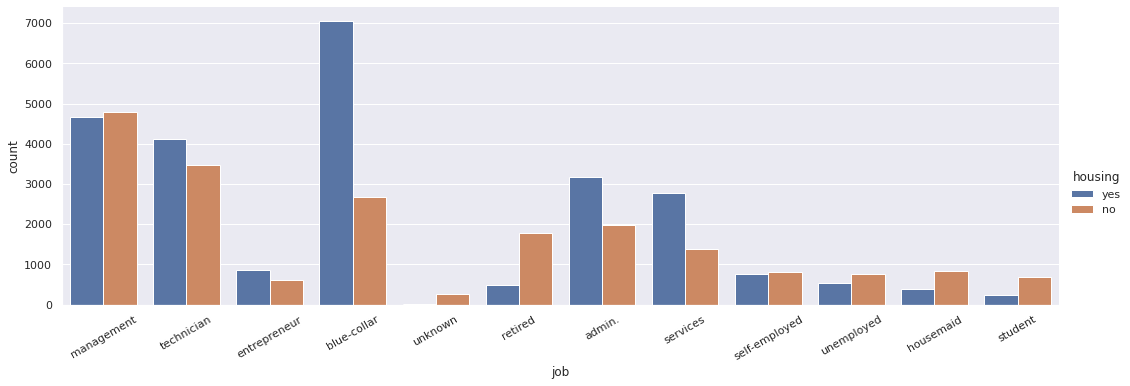

In [2]:
ax = sns.catplot(x='job', data=bank, kind='count', hue='housing', aspect=3, height=5)
labels = bank['job'].unique()
ax.set_xticklabels(labels, rotation=30);

Break up the above plot by the customer's marital status. In other words, display a separate bar plot for each category in `marital`

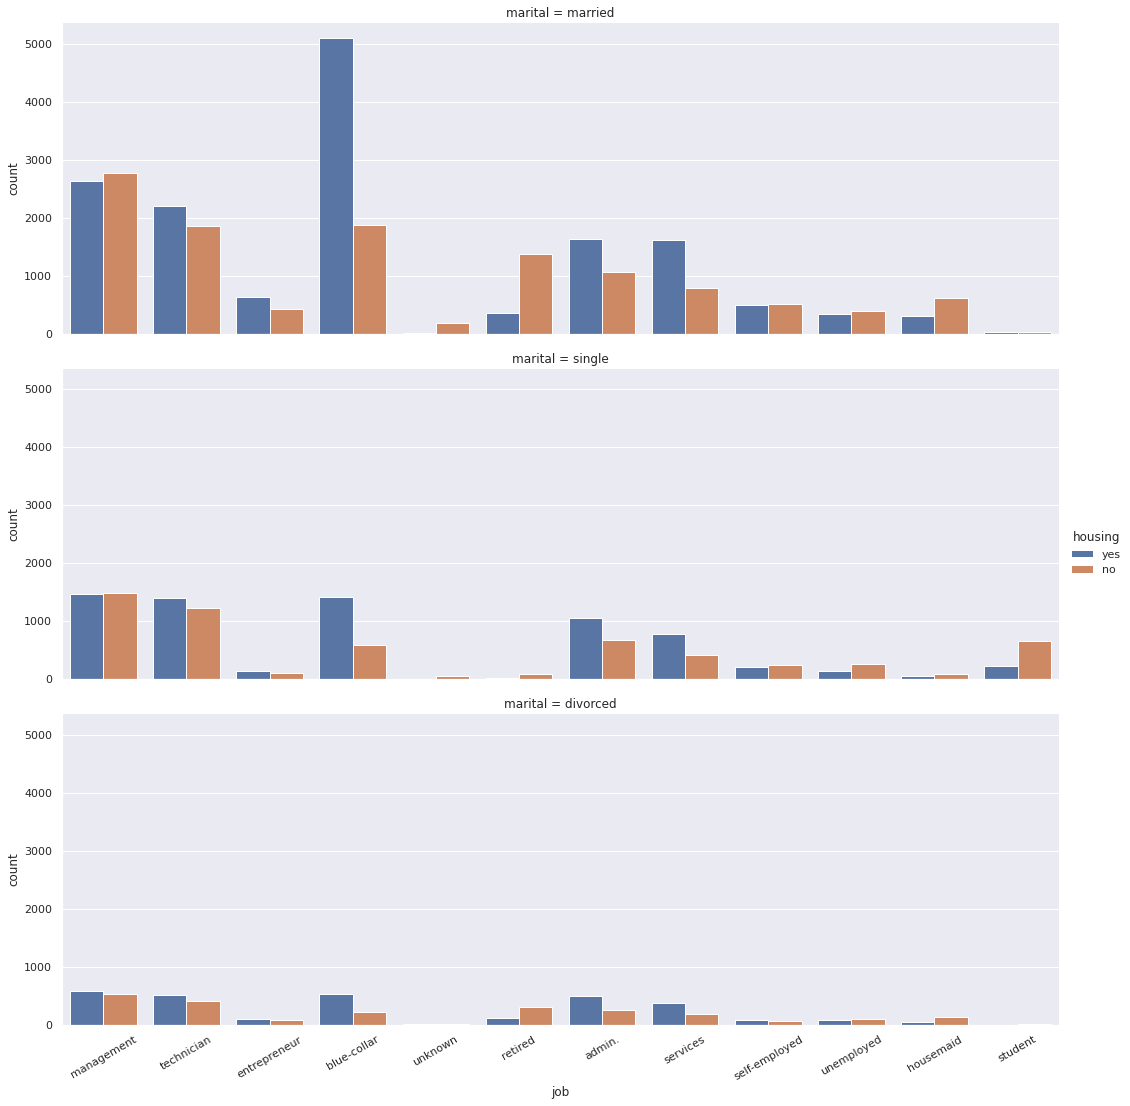

In [3]:
s = sns.catplot(x='job', data=bank, kind='count', hue='housing', row='marital', aspect=3, height=5)
labels = bank['job'].unique()
s.set_xticklabels(labels, rotation=30);

Show how homeowners and renters' balances compare, and whether this effect is different for married vs single customers. Note that balance is a highly skewed variable, so use the log of balance instead of balance itself

In [4]:
bank['log_balance'] = np.log10(bank['balance'])
positive_mask = bank['log_balance'] >= 0
bank['log_balance_positive'] = bank['log_balance'][positive_mask]

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


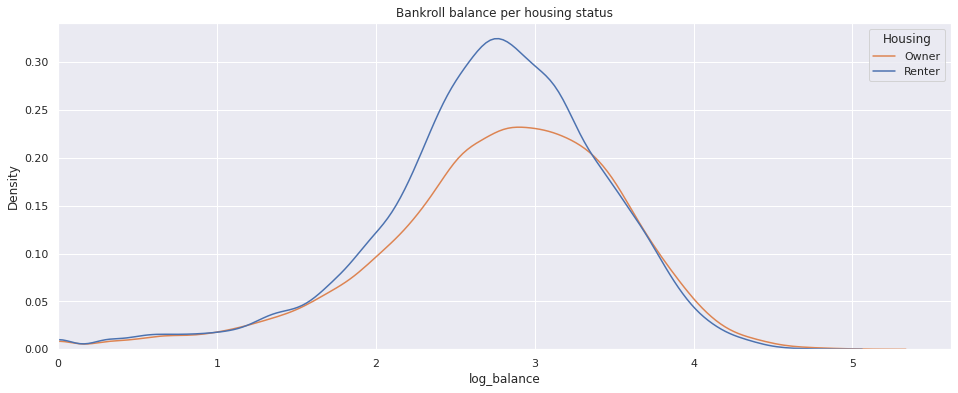

In [5]:
plt.figure(figsize=(16, 6))
h = sns.kdeplot(data=bank, x='log_balance', hue='housing')
h.set_xlim(left=0)
h.set_title('Bankroll balance per housing status')
plt.legend(title='Housing', loc='upper right', labels=['Owner', 'Renter']);

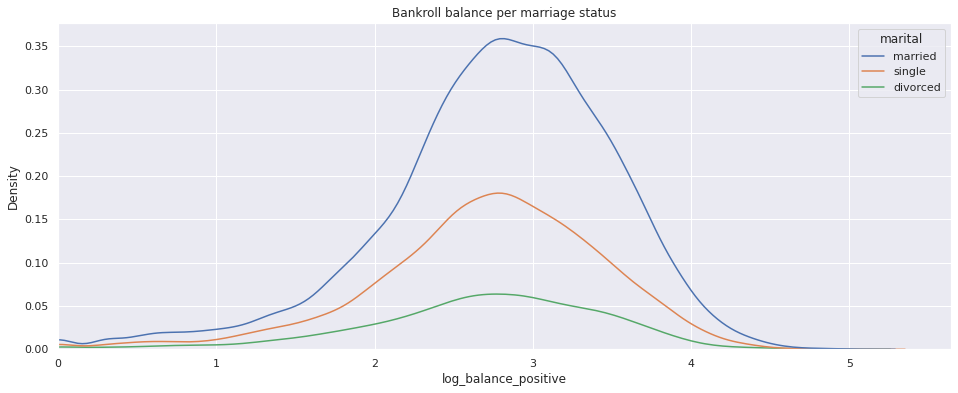

In [6]:
plt.figure(figsize=(16, 6))
j = sns.kdeplot(data=bank, x='log_balance_positive', hue='marital')
j.set_xlim(left=0)
j.set_title('Bankroll balance per marriage status');

These plots above show a rough distibuton of the balance in these peoples banks. The first one splits between housing status, and we can see a few things. First we see there are more people that are renters than there are owners, which does make sense. Next we see that overall, owners have a bit more money than their renting counterparts, which also makes sense since (generally) people save up for years to buy a house and someone can only buy a house once they have saved up notable sum of money (again, very general).

Now we look at the next plot which is also showing a rough distibuton of the balance in these peoples banks, but this time split up by marriage status. The first thing we see is that there are far more married people than not married, and that there are more single people than divorced. Unlike the previous plot, there doesn't appear to be any major differences in th distribution of wealth amongst these groups of people, because unlike housing status which is potentiallly close in proximity to a financial question (I'm not sure how else to phrase this), marriage status has little to nothing to do with ones wealth. That said you could argue that married people on the visualization above do have a slightly higher balance than the others since the peak is a little wider, if you will.

As far as similarities between the two, both plots' distributions appear to have similar tapers off to either side (respective to the plot they're in). The housing plot has two groups, and while the owners distribution is definitely shifted to the higher balance side, they seem to taper off in very similar fashions. The same can be said for the marriage plot, minus the easily noticeable offset between distributions.

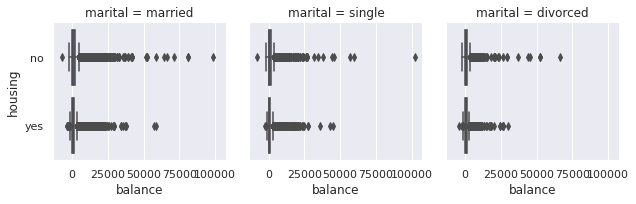

In [7]:
g = sns.FacetGrid(data = bank, col = 'marital')
g = g.map_dataframe(sns.boxplot, data = bank, x = 'balance', y = 'housing', order = ['no', 'yes'])

The above plot is not very good. It has the following flaws that you need to fix:

- The box plot is too squashed because of the `balance` has a very skewed distribution. So use `log_balance` instead. However, let the tickmark labels on the x-axis still show values for `balance`, not `log_balance`. To do this, you will need to find out how to specify where to draw tickmarks and how to specify your own labels for the tickmarks. Your tickmarks on the x-axis should show only the following balance amounts: 0, 10, 100, 1000, 10k, and 100k. Your tickmarks on the y-axis should show `rent` and `own`. <span style="color:red" float:right>[3 point]</span>
- Having three plots side by side like this is not adding any benefit. We want the plot to make it easy to compare housing vs renting, and to compare across marital status. So stack the three plots vertically instead, and strech out the plots in the horizontal direction to make use of the space. <span style="color:red" float:right>[2 point]</span>
- Color-code the box-plots so that homeowners and renters have different colors. Note that in this case, color is a redundant aesthetic, but it makes it easier to make comparisons. <span style="color:red" float:right>[1 point]</span>

I was slightly confused on whether to use only positive 'log_balance' values or not, so I have plotted them on two seperate plots. The first one is the unchanged 'log_balance' values (which looks better to my eye but I remember seeing something on Piazza about not using any negative values with the log plots). The second plot just uses the positive values. 

Also note how I had to use two 0s in my xticklabels list, if I plotted with only one 0 then the tick marks would start at 10 and the last tick would be empty. Just thought that was interesting.

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


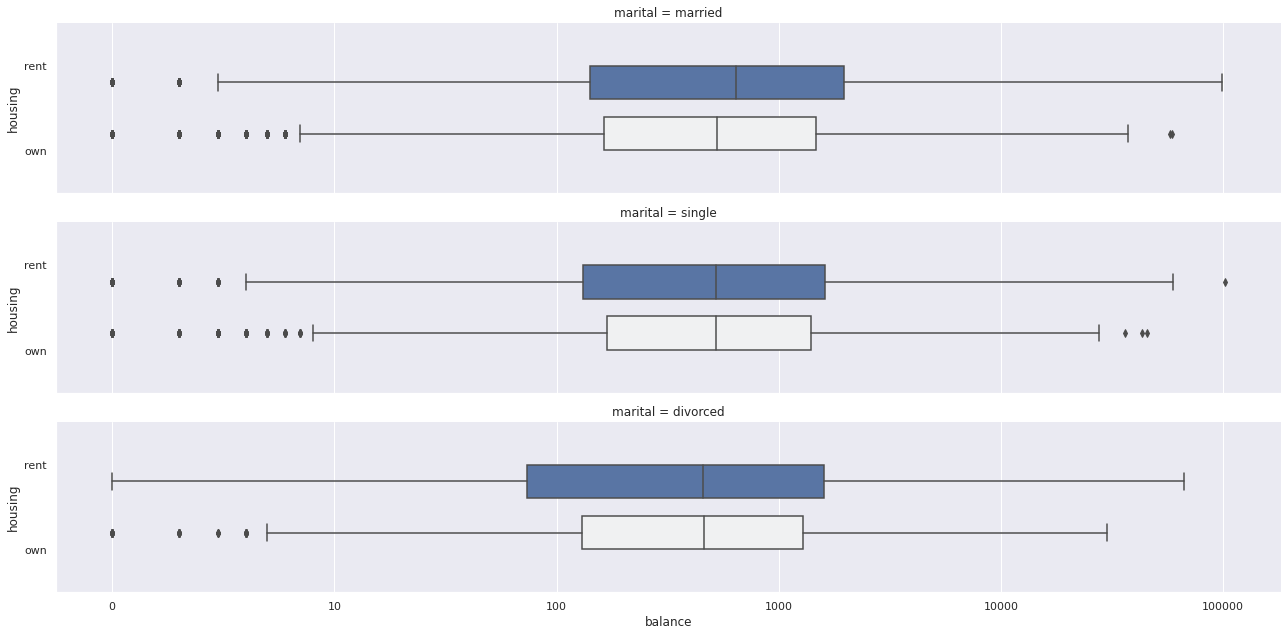

In [8]:
g = sns.FacetGrid(data = bank, row = 'marital', aspect=6)
g.map_dataframe(sns.boxplot, data = bank, x = 'log_balance', y = 'housing', order = ['no', 'yes'], hue='housing')
g.set_yticklabels(['rent', 'own'])
g.set_xlabels('balance')
g.set(xticklabels=[0,0,10,100,1000,10000,100000]);

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


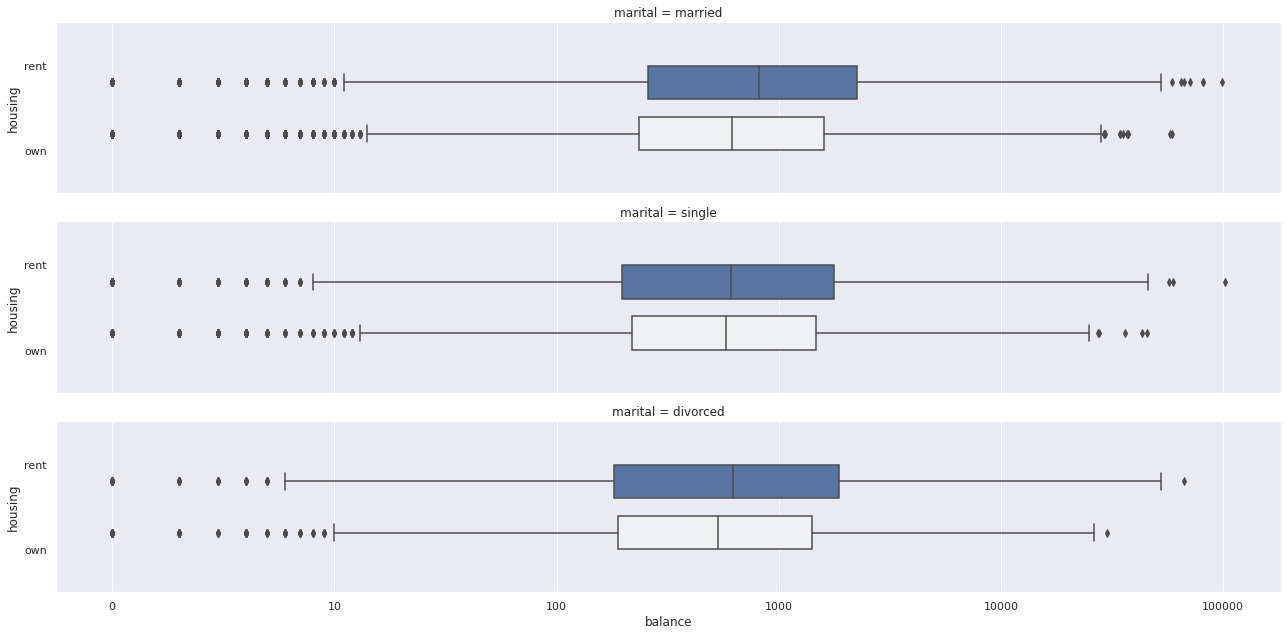

In [9]:
g = sns.FacetGrid(data = bank, row = 'marital', aspect=6)
g.map_dataframe(sns.boxplot, data = bank, x = 'log_balance_positive', y = 'housing', order = ['no', 'yes'], hue='housing')
g.set_yticklabels(['rent', 'own'])
g.set_xlabels('balance')
g.set(xticklabels=[0,0,10,100,1000,10000,100000]);